# Domain Proyek

Proyek ini menggunakan model pembelajaran mesin untuk memprediksi diagnosis kanker payudara (jinak atau ganas) berdasarkan fitur input dari kumpulan data. Dataset ini mencakup atribut klinis utama yang dapat membantu mendeteksi kanker payudara secara dini.

## Latar Belakang
Mengapa Masalah Kanker Payudara Harus Segera Diselesaikan?
Kanker payudara merupakan penyakit dimana sel - sel payudara abnormal tumbuh diluar kendali dan membentuk tumor. Jika dibiarkan, tumor tersebut dapat menyebar ke seluruh tubuh termasuk jaringan payudara terdekat (invasi) dimana nantinya tumor akan menyebabkan benjolan dan penebalan dan berakibat fatal.

Kanker payudara menjadi jenis kanker yang menempati posisi penyumbang kematian terbesar di Indonesia, dengan angka kematian mencapai lebih dari 22 ribu jiwa. Berdasarkan data Globocan tahun 2020, jumlah kasus baru kanker payudara mencapai 68.858 kasus (16,6%) dari total 396.914 kasus baru kanker di Indonesia. [Kemenkes RI](https://sehatnegeriku.kemkes.go.id/baca/umum/20220202/1639254/kanker-payudaya-paling-banyak-di-indonesia-kemenkes-targetkan-pemerataan-layanan-kesehatan/?utm_source=chatgpt.com)
  

# Bussiness Understanding

Tahap ini menjelaskan proses klarifikasi masalah.

### Problem Statements
berdasarkan latar belakang diatas, berikut ini rumusan masalah yang dapat diselesaikan pada proyek ini:
1. Bagaimana cara melakukan pra-pemrosesan pada data penyakit kanker payudara yang akan digunakan untuk membuat model yang baik?
2. Fitur apa saja yang memiliki korelasi tinggi terhadap target?
3. Model Machine Learning apa yang paling efektif untuk klasifikasi data Breast Cancer ini?

### Goals
1. Mengetahui cara pra-pemrosesan dengan baik agar dapat digunakan dalam pembuatan model.
2. Mengetahui fitur apa saja yang memiliki korelasi mendekati 1 sehingga berpengaruh terhadap target.
3. Mengetahui cara membuat model machine learning untuk memprediksi penyakit kanker payudara.

### Solution Statements
Solusi yang dapat dilakukan untuk memenuhi tujuan dari proyek ini diantaranya :

Untuk pra-pemrosesan data dapat dilakukan beberapa teknik, diantaranya :
- Melakukan drop kolom pada kolom ID.
- Melakukan Encoding terhadap kolom yang bertipe object.
- Melakukan pembagian dataset menjadi dua bagian dengan rasio 80% untuk data latih dan 20% untuk data uji.
- Melakukan Standard Scaler.

- Melakukan korelasi untuk mengetahui fitur mana saja yang nilai korelasinya mendekati 1 terhadap target yang ada pada tahap EDA

- Untuk pembuatan model dipilih penggunaan model dengan algoritma SVM dan Logistic Regression. Algoritma tersebut dipilih karena mudah digunakan dan juga cocok untuk kasus ini.


# Data Understanding

Tahap ini memberikan informasi seperti jumlah data, kondisi data, dan informasi mengenai data yang digunakan, tautan sumber data (link download), dan menguraikan seluruh variabel atau fitur pada data.


| Jenis | Keterangan |
| ------ | ------ |
| Sumber | [Kaggle : Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)|
| Lisensi | CC0 : Public Domain|
| Kategori | Kesehatan|
| Jumlah data | 569 data|

In [255]:
# import libraries
import numpy as np
import pandas as pd  # untuk manipulasi data
import matplotlib.pyplot as plt  # untuk visualisasi data
import seaborn as sns    # untuk visualisasi data
import warnings

In [256]:
# import data
path = '/content/breast_cancer.csv'

In [257]:
# Melihat data
df = pd.read_csv(path)

In [258]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [259]:
# Melihat berapa banyak jumlah kolom dan baris pada data
df.shape

(569, 32)

Terdapat 569 data dengan 32 kolom (fitur)

In [260]:
# Melihat Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Terdapat:
- data bertipe int64 (id)
- data bertipe object (diagnosis)
- 30 fitur lainnya memiliki tipe data float64

dan semua tipe data sudah sesuai dengan masing-masing fitur



In [261]:
# Melihat apakah ada missing value
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


Tidak ada data kosong/NaN pada dataset ini

In [262]:
# Melihat fitur apa saja yang ada dalam dataset
columns = df.columns

In [263]:
# Melihat statistik data numerik
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [264]:
# Melihat apakah ada data yang duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat

## Exploratory Data Analysis

Melakukan eksplorasi tiap fitur yang ada pada data untuk mendapatkan insight

In [265]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


Target analisis data ini adalah fitur "diagnosis" yang memiliki 357 data Benign dan 212 data Malignant

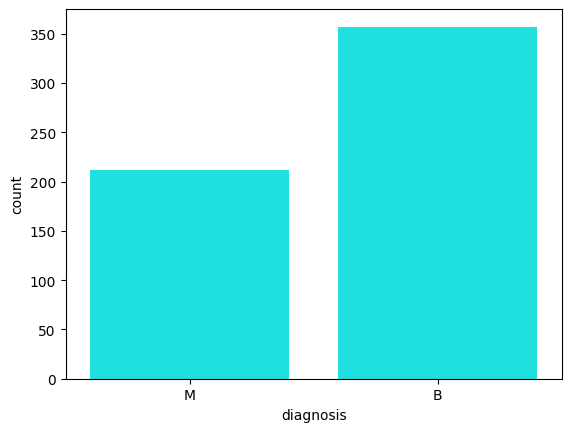

In [266]:
# Visualisasi kolom target
sns.countplot(x=df["diagnosis"], color='cyan')
plt.show()

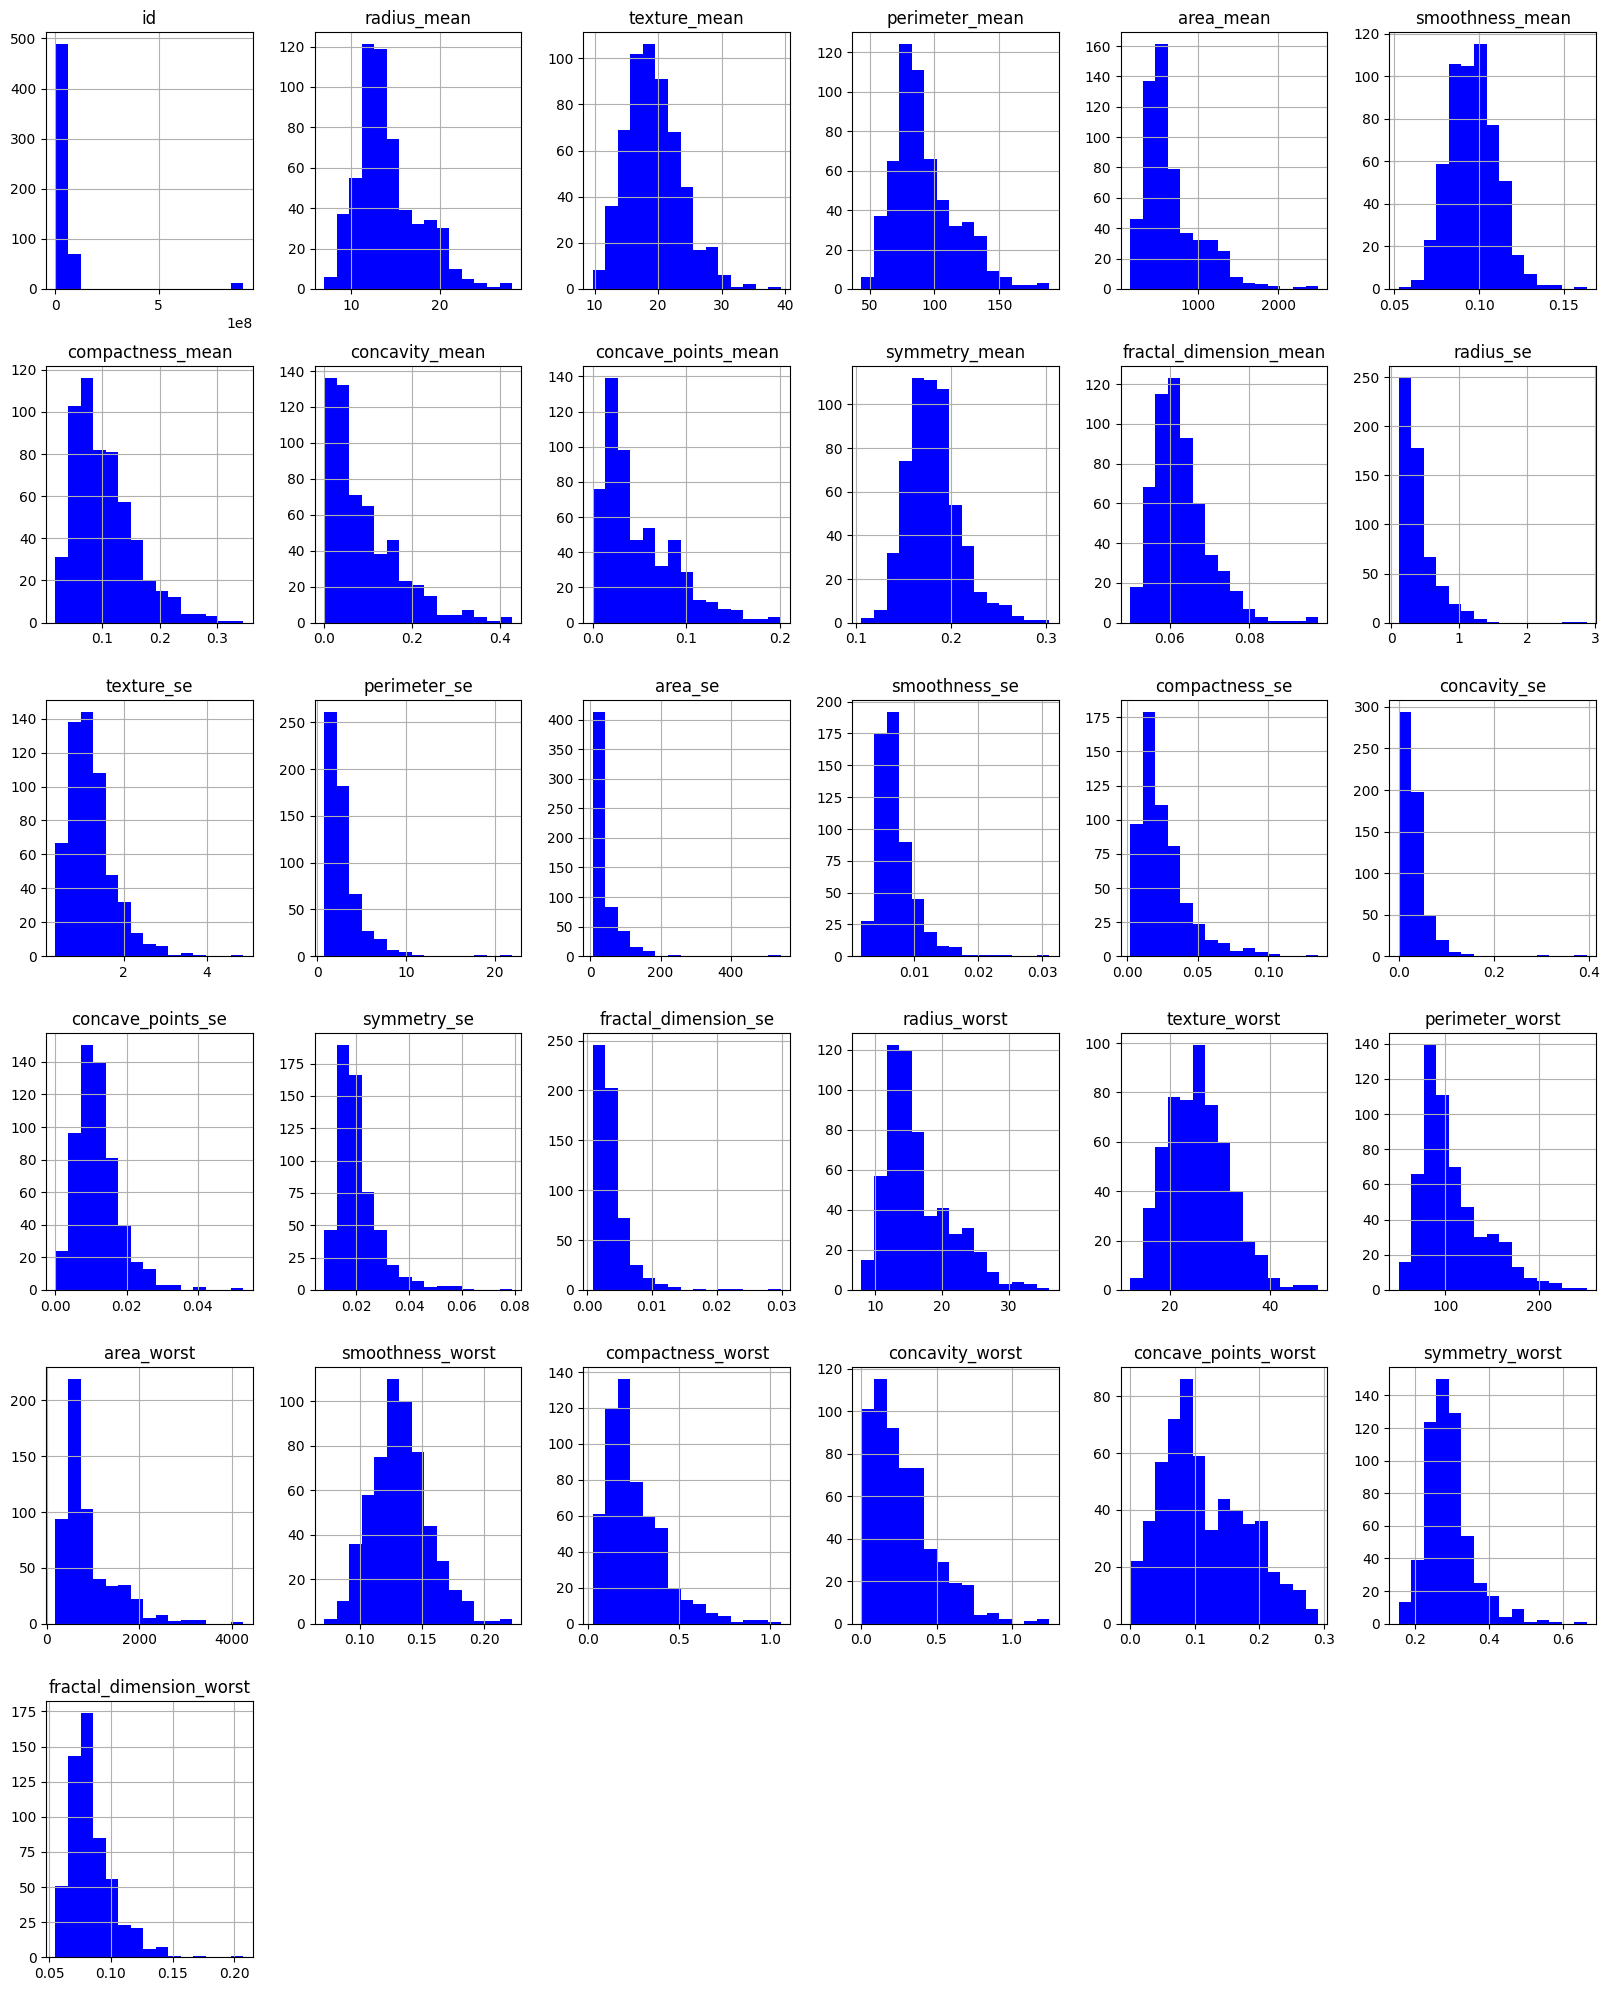

In [267]:
# Visualisasi setiap kolom numerik
df.hist(figsize=(20,25), bins=15, color='blue')
plt.show()

In [268]:
for c in columns:
  print(df[c].value_counts())
  print()

id
842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: count, Length: 569, dtype: int64

diagnosis
B    357
M    212
Name: count, dtype: int64

radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64

texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64

perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64

area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: count, Length: 539, dtype: int64

smoothness_mean
0.10070    5
0.11500    4
0

In [269]:
# Mengubah M menjadi angka 1 dan B menjadi angka 0 agar mempermudah encoding
df["diagnosis"].replace(["M", "B"], [1,0], inplace=True)
df.head()

<ipython-input-269-d32516c19a09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["diagnosis"].replace(["M", "B"], [1,0], inplace=True)
<ipython-input-269-d32516c19a09>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["diagnosis"].replace(["M", "B"], [1,0], inplace=True)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


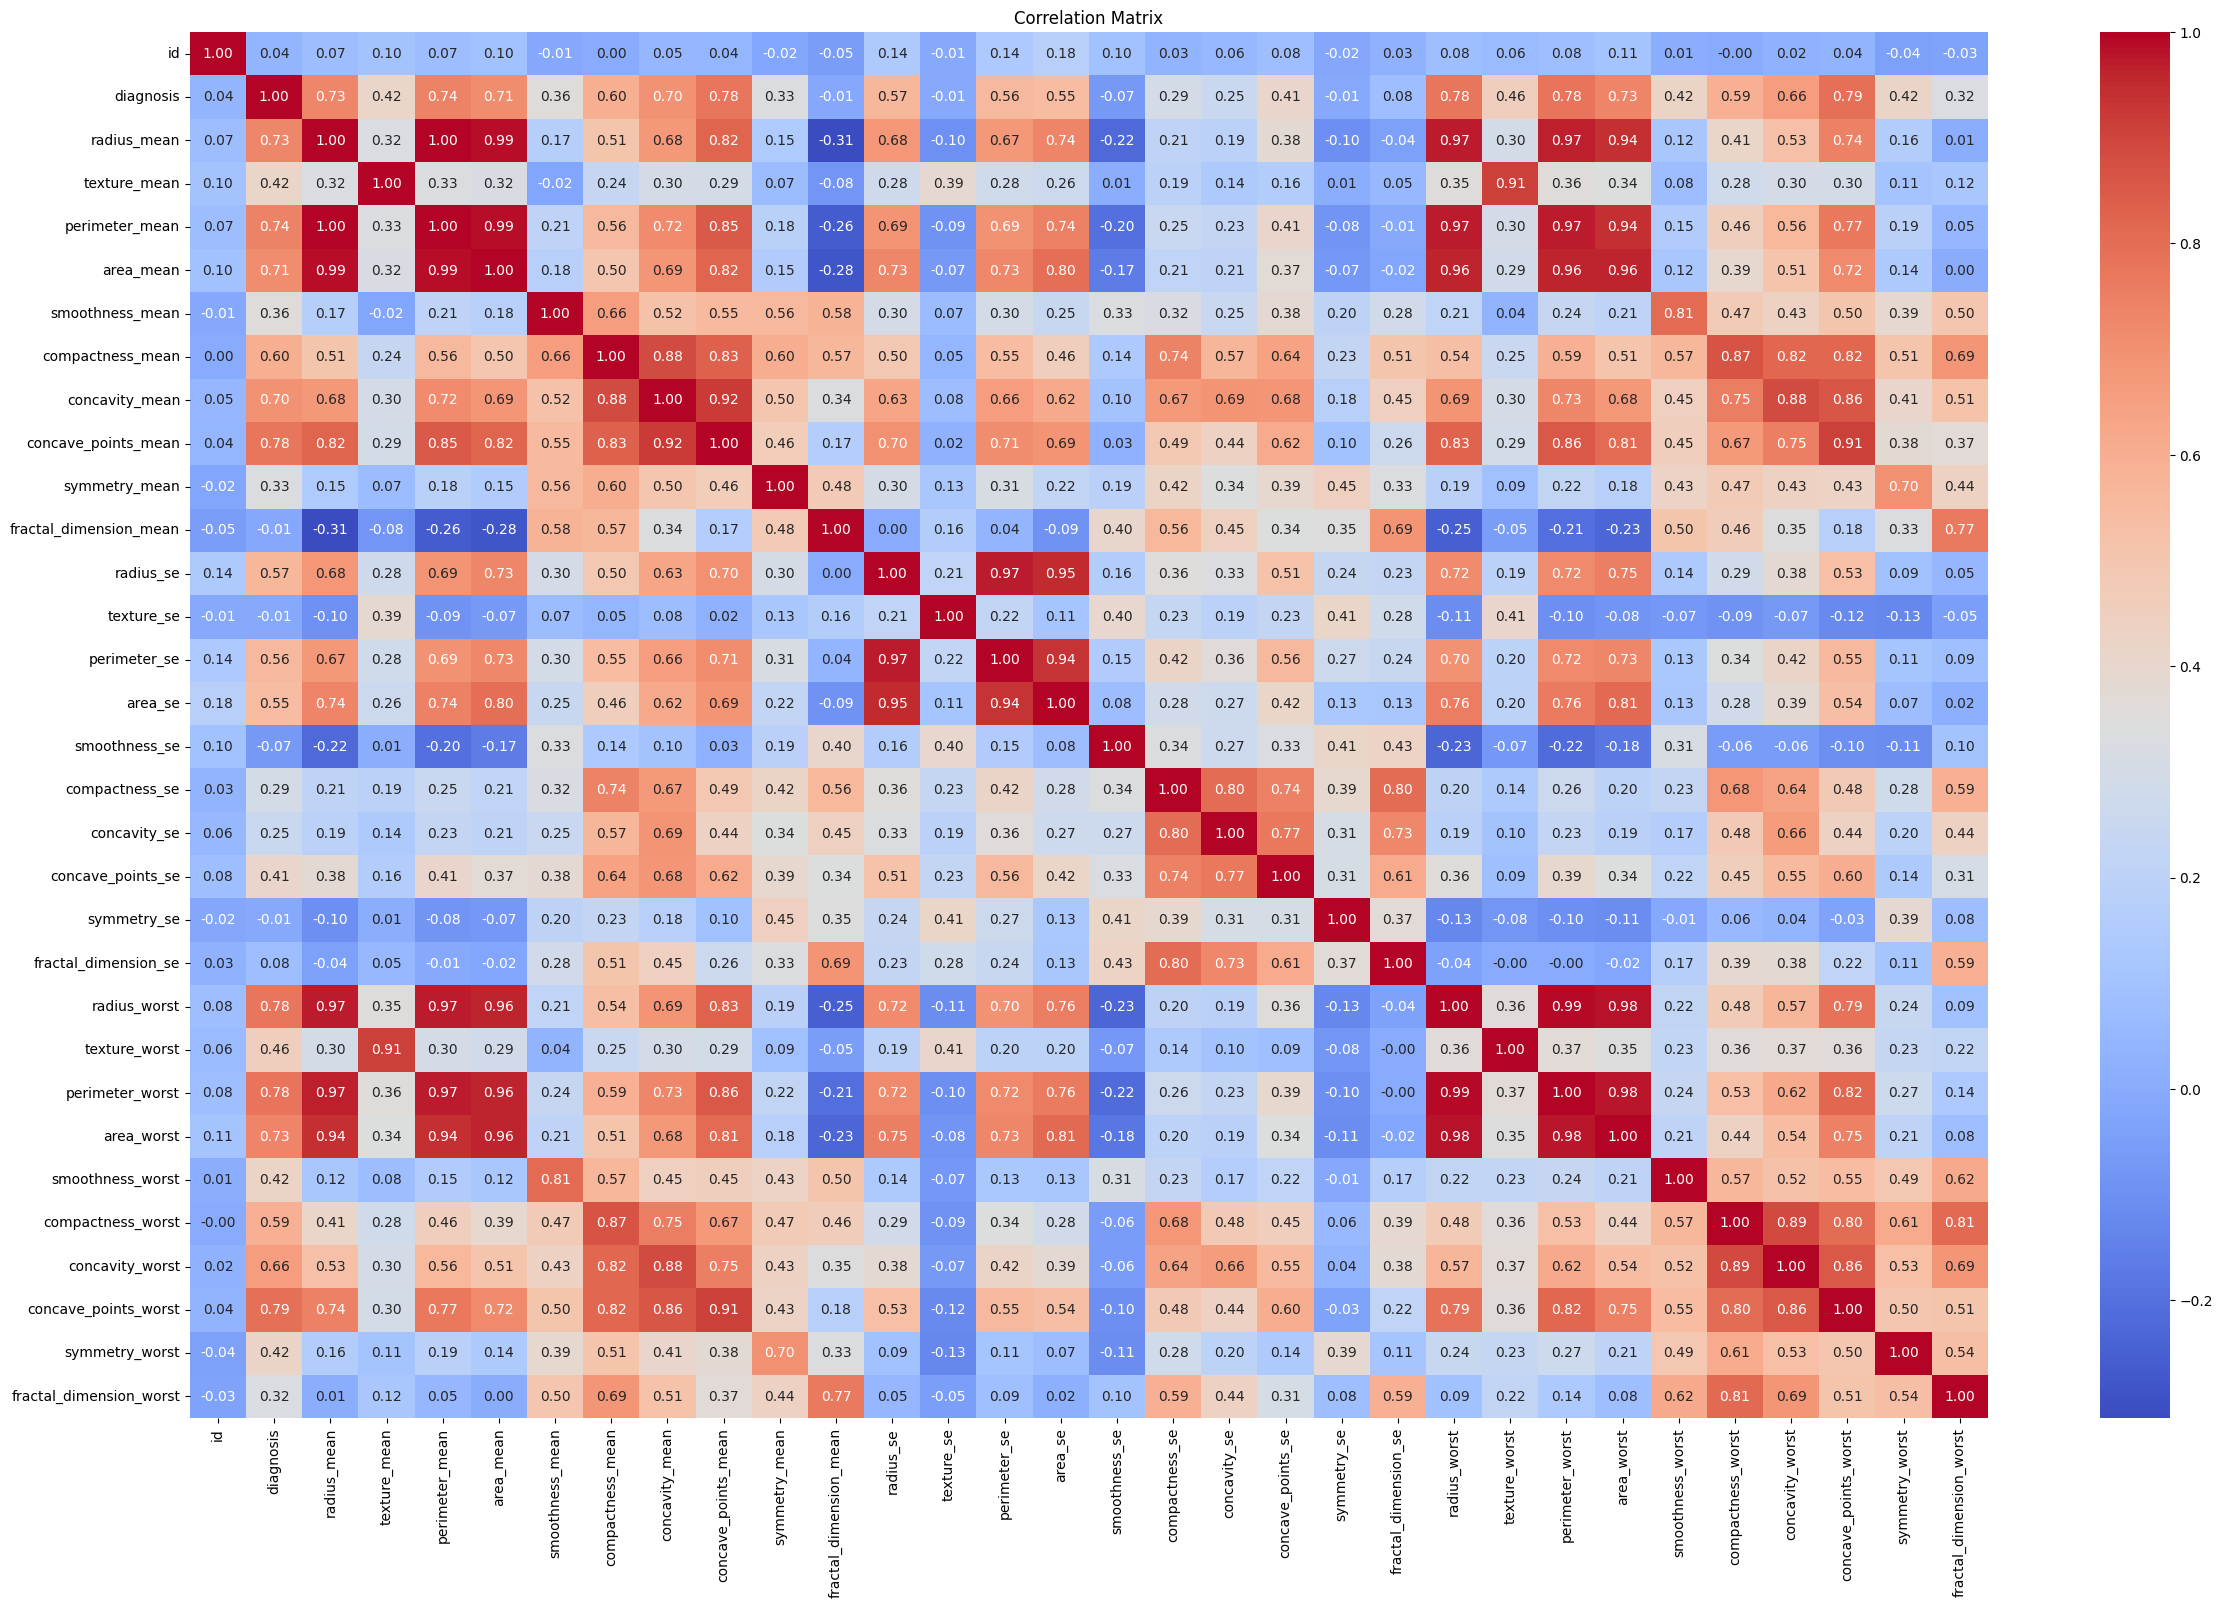

In [270]:
# Melihat korelasi setiap kolom
corr_matrix = df.corr()
plt.figure(figsize=(29, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [271]:
# Melihat m=fitur mana saja yang memiliki nilai korelasi antara 0.7-1 terhadap target

cor_target = abs(corr_matrix['diagnosis'])
relevant_features =cor_target[cor_target>0.7]
relevant_features

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
perimeter_mean,0.742636
area_mean,0.708984
concave_points_mean,0.776614
radius_worst,0.776454
perimeter_worst,0.782914
area_worst,0.733825
concave_points_worst,0.793566


Pada data understanding didapatkan insight dari melakukan EDA pada tiap fitur serta mengetahui fitur mana saja yang memiliki nilai korelasi mendekati 1 terhadap target antara lain :     
radius_mean, parameter_mean, area_mean, concave_points_mean, radius_worst, perimeter_worst, area_worst, dan convcave_points_worst.

# Data Preparation

Tahap ini dilakukan untuk mempersiapkan data untuk memasuki tahap modeling.
Adapun beberapa langkah yang dilakukan pada data preparation antara lain :    
1. drop kolom "id"
2. melakukan label encoding untuk mengurangi dimensi data
3. mendefinisikan kolom X sebagai target dan y sebagai fitur
4. split data training dan testing
5  melakukan standarisari

In [272]:
# Drop kolom "id"
df.drop(columns='id', inplace=True)

Melakukan drop kolom "id" karena merupakan kolom dengan nilai unik sehingga tidak perlu digunakan pada model

In [273]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Tersisa 31 fitur

In [274]:
# Melakukan Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [275]:
# Mendefinisikan
# X sebagai target ("diagnosis")
# y sebagai fitur

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [276]:
# Split data untuk train dan test (80:20)
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=42)

In [277]:
# Standarisasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling



Melakukan modeling terhadap data dengan 2 metode klasifikasi untuk mengetahui model mana yang memiliki nilai akurasi terbaik terhadap dataset ini.
Adapun model klasifikasi yang dignakan adalah SVM Classifier dan Logistic Regression Classifier

# SVM Classifier

In [278]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [279]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

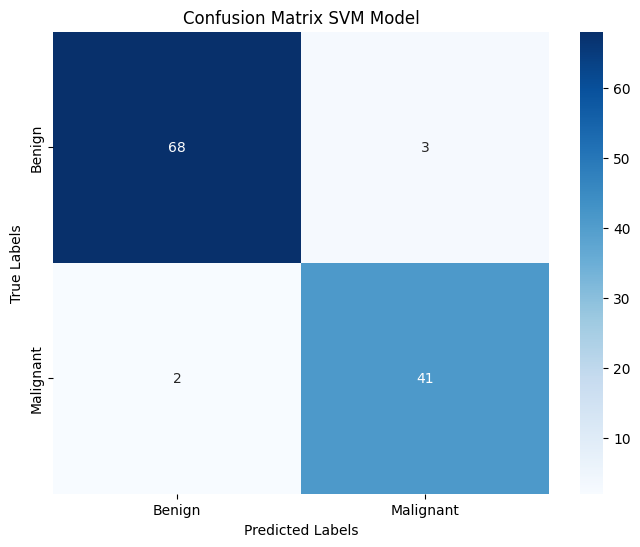

In [280]:
#Print Confussion Matrix

cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=[ 'Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix SVM Model')
plt.show()

Hasil confussion matriks SVM Classifier adalah 68 (True Positive) 2 (False Negative) 3 (False Positive) dan 41 (True Netagive)

In [281]:
accuracy_svm = accuracy_score(y_test, y_pred)
accuracy_svm

0.956140350877193

Model SVM memiliki nilai akurasi sebesar 95.6 %

In [282]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [283]:
report_svm = classification_report(y_test, y_pred, output_dict=True)

In [284]:
report_df = pd.DataFrame(report_svm).transpose()

In [285]:
display(report_df)

,precision,recall,f1-score,support
0,0.971429,0.957746,0.964539,71.00000
1,0.931818,0.953488,0.942529,43.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.951623,0.955617,0.953534,114.00000
weighted avg,0.956488,0.956140,0.956237,114.00000


# Logistic Regression Classifier

In [286]:
from IPython.display import display

In [287]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=24)

# Fit the model according to the given training data.
log.fit(X_train, y_train)

# Predict class labels for samples in X.
y_pred = log.predict(X_test)

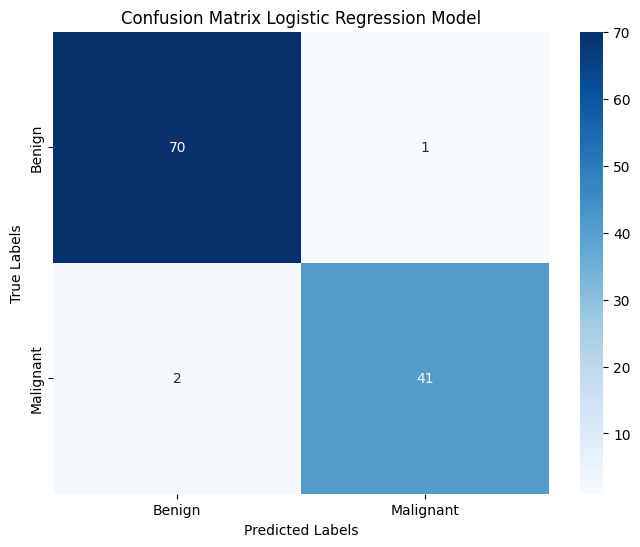

In [288]:
#Print Confussion Matrix

cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=[ 'Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Logistic Regression Model')
plt.show()

Hasil confussion matriks LogReg Classifier adalah 70 (True Positive) 2 (False Negative) 1 (False Positive) dan 41 (True Netagive)

In [289]:
accuracy_logreg = accuracy_score(y_test, y_pred)
accuracy_logreg

0.9736842105263158

Model logistik regresi memiliki nilai akurasi sebesar 97.3%

In [290]:
report_logres = classification_report(y_test, y_pred, output_dict=True)

In [291]:
report_df = pd.DataFrame(report_logres).transpose()

In [292]:
print(report_df)

              precision    recall  f1-score     support
0              0.972222  0.985915  0.979021   71.000000
1              0.976190  0.953488  0.964706   43.000000
accuracy       0.973684  0.973684  0.973684    0.973684
macro avg      0.974206  0.969702  0.971863  114.000000
weighted avg   0.973719  0.973684  0.973621  114.000000


In [293]:
display(report_df)

,precision,recall,f1-score,support
0,0.972222,0.985915,0.979021,71.000000
1,0.976190,0.953488,0.964706,43.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.974206,0.969702,0.971863,114.000000
weighted avg,0.973719,0.973684,0.973621,114.000000


# Evaluation

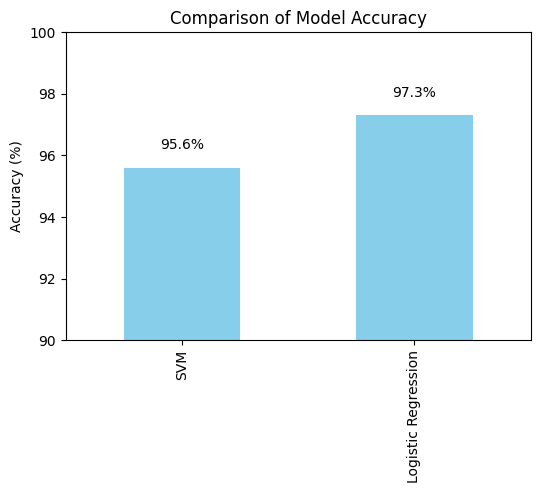

In [299]:
# Visualisasi perbandingan akurasi kedua model

report_svm = {'accuracy': 0.956}
report_logres = {'accuracy': 0.973}

compareAccuracy = {
    'SVM': report_svm['accuracy'] * 100,
    'Logistic Regression': report_logres['accuracy'] * 100
}

# Ubah dictionary menjadi DataFrame
df = pd.DataFrame(compareAccuracy, index=['Accuracy']).transpose()

# Plot bar
ax = df.plot(kind='bar', legend=False, color='skyblue', figsize=(6, 4))
plt.ylim(90, 100)  # Fokus pada rentang 90-100
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy')

# Tambahkan nilai di atas batang
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posisi x (tengah batang)
        height + 0.5,  # Posisi y (sedikit di atas batang)
        f"{height:.1f}%",  # Format nilai (misal 95.0%)
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

Dengan ini dapat disimpulkan bahwa :    
1. Untuk pra-pemrosesan data dapat dilakukan beberapa teknik, diantaranya :
- Melakukan drop kolom pada kolom ID.
- Melakukan Encoding terhadap kolom yang bertipe object.
- Melakukan pembagian dataset menjadi dua bagian dengan rasio 80% untuk data latih dan 20% untuk data uji.
- Melakukan Standard Scaler.

2. Pada data understanding didapatkan insight dari melakukan EDA pada tiap fitur serta mengetahui fitur mana saja yang memiliki nilai korelasi mendekati 1 terhadap target antara lain :     
radius_mean, parameter_mean, area_mean, concave_points_mean, radius_worst, perimeter_worst, area_worst, dan convcave_points_worst.


3. Setelah dilakukan proses klasifikasi menggunakan model SVM dan Logistic Regression, dapat disimpulkan bahwa model dengan akurasi terbaik adalah Logistic Regression dengan akurasi mencapai 97%
